<a href="https://colab.research.google.com/github/DjelloulFerrah/DjelloulFerrah/blob/main/Copie_de_06Mars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.preprocessing import image
from IPython.display import Image
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### conteur des objet dans limage 

In [7]:
import os
import cv2

def detect_and_draw_contours_drive(chemain_int, chemain_out):
    # Créer le dossier de sortie s'il n'existe pas déjà
    if not os.path.exists(chemain_out):
        os.makedirs(chemain_out)

    # Parcourir chaque image dans le dossier d'entrée
    for filename in os.listdir(chemain_int):
        # Charger l'image
        img = cv2.imread(os.path.join(chemain_int, filename))

        # Convertir en niveau de gris
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Appliquer un seuillage de l'image pour améliorer les contours // binary two color 
        ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

        #  filtre médian pour enlever le bruit
        median = cv2.medianBlur(thresh, 5)
        #  filtre Gaussien pour lisser l'image
        gaussian = cv2.GaussianBlur(median, (5, 5), 0)

        # detect contours on binary image
        contours, _ = cv2.findContours(gaussian, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

        # draw contours on original image
        if len(contours) != 0:
          img_contours = img.copy().copy()
          cv2.drawContours(img_contours, contours, -1, (0, 255, 0), 9, lineType=cv2.LINE_AA)

        # Enregistrer l'image avec les contours dessinés dans le dossier de sortie
        cv2.imwrite(os.path.join(chemain_out, filename), img_contours)

In [8]:
chemain_int = '/content/drive/MyDrive/DATASET_28Fév/datasetOriginale'
chemain_out_conteur = '/content/drive/MyDrive/DATASET_28Fév/conteur_objet'
detect_and_draw_contours_drive(chemain_int, chemain_out_conteur)

### gamma correction :

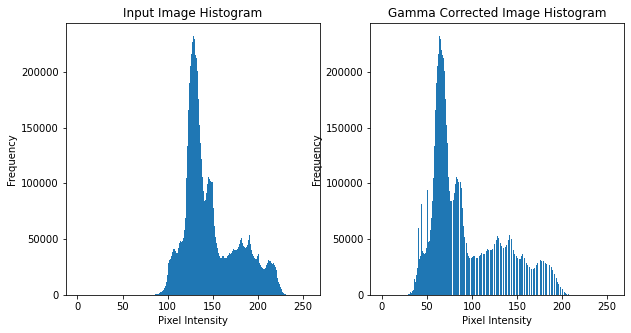

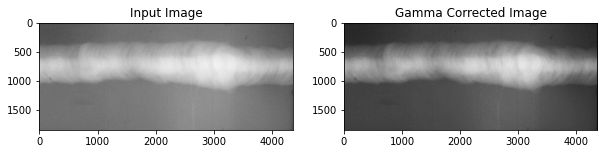

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def gamma_correction(image, gamma=1.0):
    # Build a lookup table mapping the pixel values [0, 255] to their adjusted gamma values
    inv_gamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** inv_gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    # Apply gamma correction using the lookup table
    return cv2.LUT(image, table)

# # Charger l'image
# img_1 = cv2.imread('/content/drive/MyDrive/DATASET_28Fév/datasetOriginale/IMG_1344.JPG', cv2.IMREAD_GRAYSCALE)
img_1 = cv2.imread('/content/drive/MyDrive/DATASET_28Fév/datasetOriginale/IMG_1214.JPG', cv2.IMREAD_GRAYSCALE)


# Apply gamma correction
img_gamma = gamma_correction(img_1, gamma=0.5)

# Plot histograms of input and output images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(img_1.ravel(), 256, [0, 256])
plt.title('Input Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
plt.hist(img_gamma.ravel(), 256, [0, 256])
plt.title('Gamma Corrected Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

# Display input and output images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_1, cmap='gray')
plt.title('Input Image')
plt.subplot(1, 2, 2)
plt.imshow(img_gamma, cmap='gray')
plt.title('Gamma Corrected Image')
plt.show()


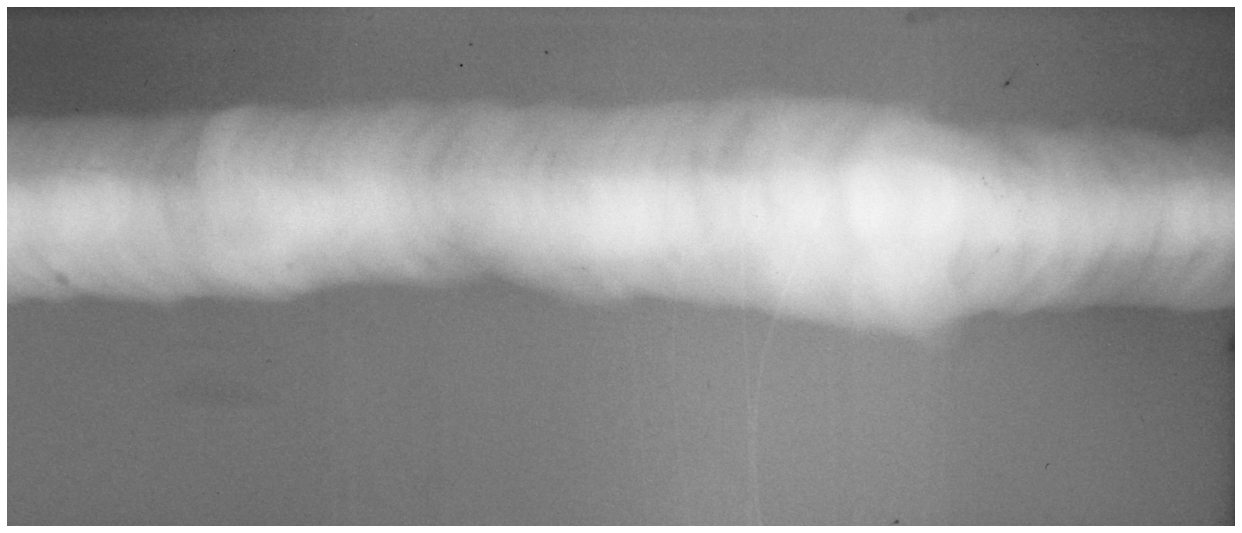

In [31]:
plt.figure(figsize=(22, 22))
plt.imshow(img_1, cmap='gray')
plt.axis('off')
plt.show()

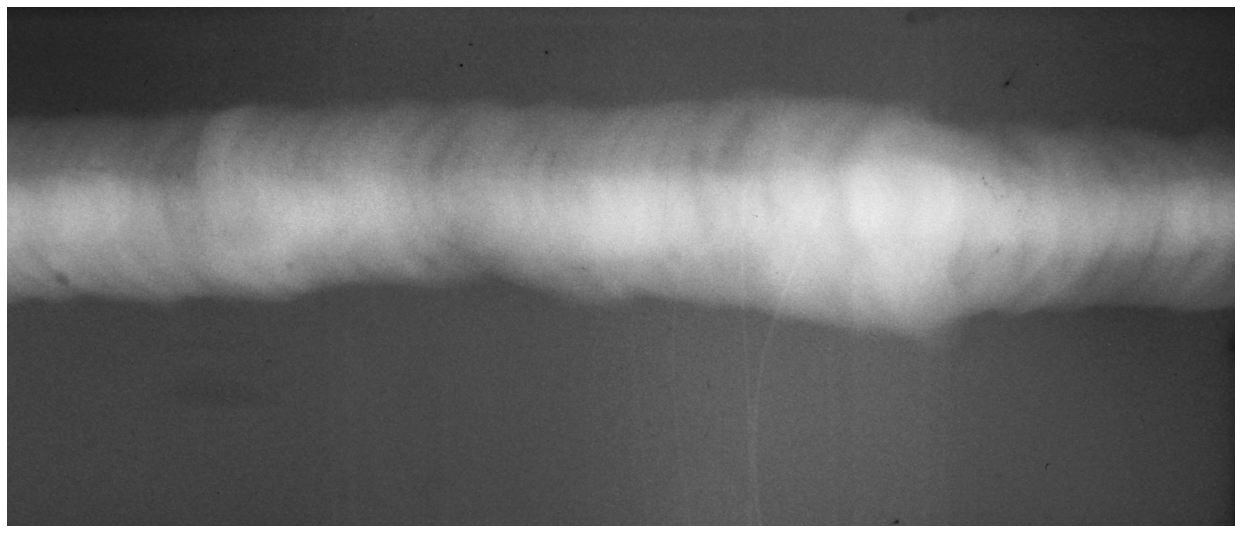

In [32]:
plt.figure(figsize=(22, 22))
plt.imshow(img_gamma, cmap='gray')
plt.axis('off')
plt.show()

### save gamma resultat

In [48]:
import os
import cv2
import numpy as np

def gamma_correction(image, gamma=1.0):
    # Build a lookup table mapping the pixel values [0, 255] to their adjusted gamma values
    inv_gamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** inv_gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    # Apply gamma correction using the lookup table
    return cv2.LUT(image, table)

def save_gamma_results(input_dir, output_dir, gamma):
    # Create the output directory if it doesn't already exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Loop over each image in the input directory
    for filename in os.listdir(input_dir):
        # Load the image
        img = cv2.imread(os.path.join(input_dir, filename))

        # Apply gamma correction
        img_gamma = gamma_correction(img, gamma)

        # Save the gamma corrected image to the output directory
        cv2.imwrite(os.path.join(output_dir, filename), img_gamma)

In [49]:
input_dir = '/content/drive/MyDrive/DATASET_28Fév/datasetOriginale'
output_dir = '/content/drive/MyDrive/DATASET_28Fév/gamma_correction_results'
gamma = 0.5
save_gamma_results(input_dir, output_dir, gamma)

### égaliser l'histogramme

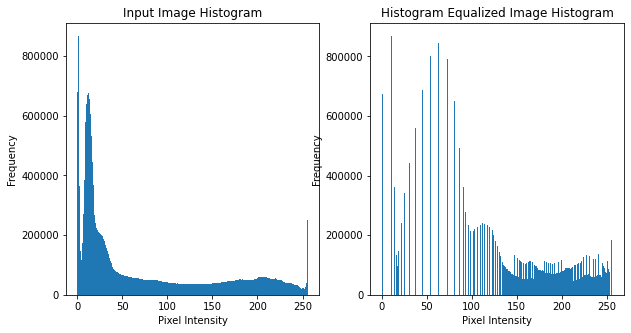

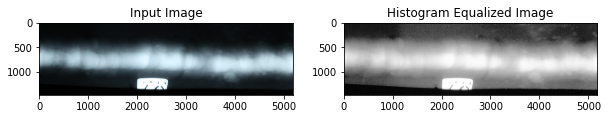

In [45]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def histogram_equalization(image):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply histogram equalization
    equalized = cv2.equalizeHist(gray)
    # Convert image back to color
    equalized = cv2.cvtColor(equalized, cv2.COLOR_GRAY2BGR)
    return equalized

# Read input image
img_2 = cv2.imread('/content/drive/MyDrive/DATASET_28Fév/datasetOriginale/IMG_0586.JPG')
# img_2 = cv2.imread('/content/drive/MyDrive/DATASET_28Fév/datasetOriginale/IMG_1214.JPG')


# Apply histogram equalization
img_histeq = histogram_equalization(img_2)


# Plot histograms of input and output images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(img_2.ravel(), 256, [0, 256])
plt.title('Input Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
plt.hist(img_histeq.ravel(), 256, [0, 256])
plt.title('Histogram Equalized Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

# Display input and output images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB))
plt.title('Input Image')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_histeq, cv2.COLOR_BGR2RGB))
plt.title('Histogram Equalized Image')
plt.show()


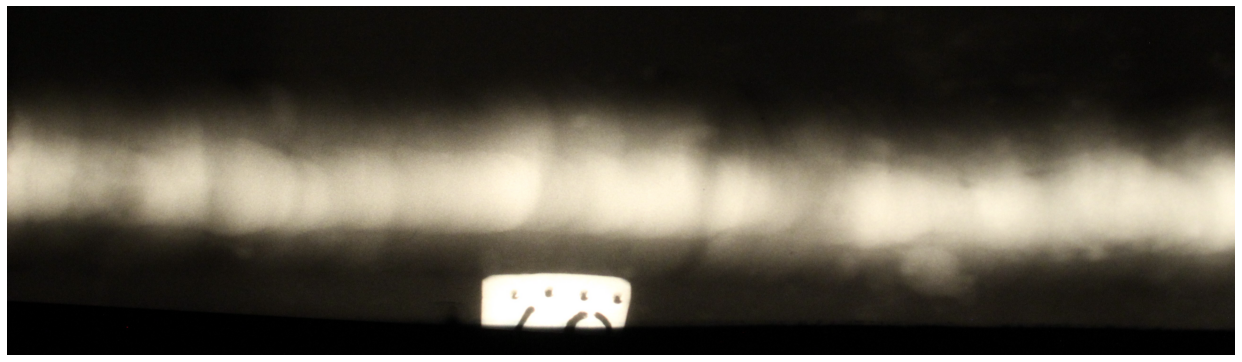

In [46]:
plt.figure(figsize=(22, 22))
plt.imshow(img_2, cmap='gray')
plt.axis('off')
plt.show()

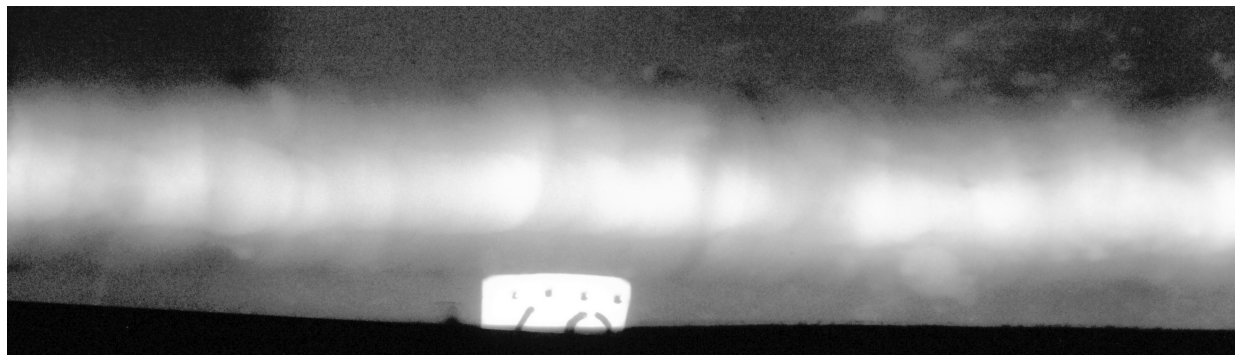

In [47]:
plt.figure(figsize=(22, 22))
plt.imshow(img_histeq, cmap='gray')
plt.axis('off')
plt.show()

### save histogram_equalization images

In [50]:
import os
import cv2

def histogram_equalization(image):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply histogram equalization
    equalized = cv2.equalizeHist(gray)
    # Convert image back to color
    equalized = cv2.cvtColor(equalized, cv2.COLOR_GRAY2BGR)
    return equalized

def save_histogram_equalization_results(input_folder, output_folder):
    # Create the output folder if it does not already exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Iterate over each image in the input folder
    for filename in os.listdir(input_folder):
        # Load the image
        img = cv2.imread(os.path.join(input_folder, filename))

        # Apply histogram equalization
        img_eq = histogram_equalization(img)

        # Save the image with the equalization applied to the output folder
        cv2.imwrite(os.path.join(output_folder, filename), img_eq)

# Set the input and output folder paths
input_folder = '/content/drive/MyDrive/DATASET_28Fév/datasetOriginale'
output_folder = '/content/drive/MyDrive/DATASET_28Fév/histogram_equalization_results'

# Apply the histogram equalization to all images in the input folder and save the results to the output folder
save_histogram_equalization_results(input_folder, output_folder)

### Augmentation de contraste adaptatif

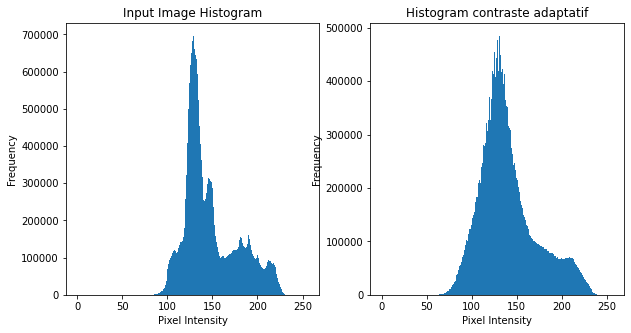

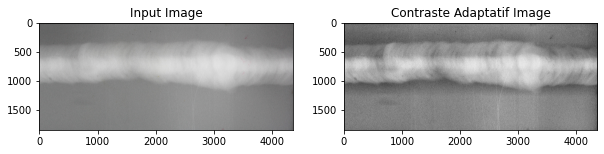

In [54]:
import cv2

def adaptive_contrast(image, clip_limit=2.0, tile_size=(8, 8)):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply adaptive contrast using CLAHE (Contrast Limited Adaptive Histogram Equalization)
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_size)
    equalized = clahe.apply(gray)
    
    # Convert image back to color
    equalized = cv2.cvtColor(equalized, cv2.COLOR_GRAY2BGR)
    
    return equalized
    # Read input image

img_3 = cv2.imread('/content/drive/MyDrive/DATASET_28Fév/datasetOriginale/IMG_1214.JPG')
# img_2 = cv2.imread('/content/drive/MyDrive/DATASET_28Fév/datasetOriginale/IMG_1214.JPG')


# Apply histogram equalization
img_adaptive_contrast = adaptive_contrast(img_3)


# Plot histograms of input and output images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(img_3.ravel(), 256, [0, 256])
plt.title('Input Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
plt.hist(img_adaptive_contrast.ravel(), 256, [0, 256])
plt.title('Histogram contraste adaptatif')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

# Display input and output images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img_3, cv2.COLOR_BGR2RGB))
plt.title('Input Image')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_adaptive_contrast, cv2.COLOR_BGR2RGB))
plt.title('Contraste Adaptatif Image')
plt.show()


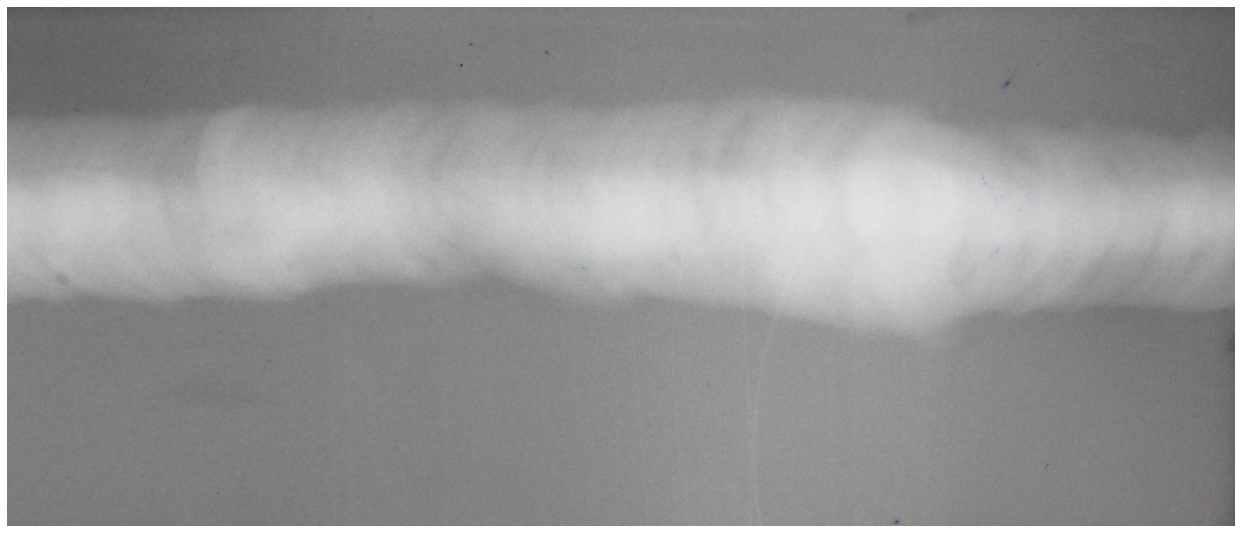

In [55]:
plt.figure(figsize=(22, 22))
plt.imshow(img_3, cmap='gray')
plt.axis('off')
plt.show()

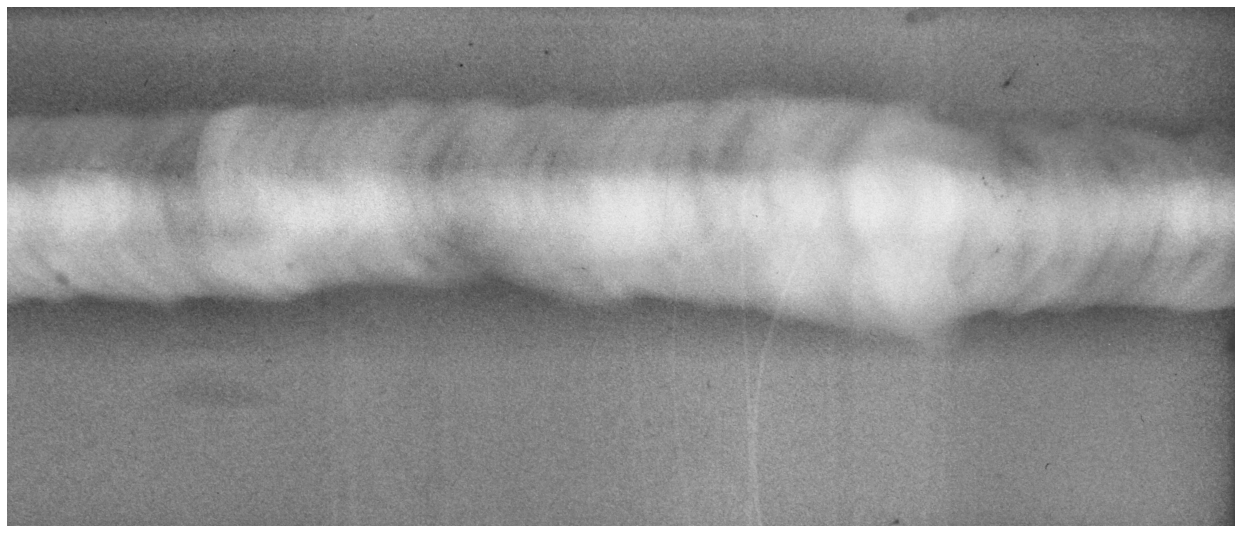

In [56]:
plt.figure(figsize=(22, 22))
plt.imshow(img_adaptive_contrast, cmap='gray')
plt.axis('off')
plt.show()

### save contraste adaptatif

In [57]:
import os
import cv2

def adaptive_contrast(image, clip_limit=2.0, tile_size=(8, 8)):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply adaptive contrast using CLAHE (Contrast Limited Adaptive Histogram Equalization)
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_size)
    equalized = clahe.apply(gray)
    # Convert image back to color
    equalized = cv2.cvtColor(equalized, cv2.COLOR_GRAY2BGR)
    return equalized

def save_adaptive_contrast_results(input_folder, output_folder):
    # Create the output folder if it does not already exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Iterate over each image in the input folder
    for filename in os.listdir(input_folder):
        # Load the image
        img = cv2.imread(os.path.join(input_folder, filename))

        # Apply histogram equalization
        img_eq = adaptive_contrast(img)

        # Save the image with the equalization applied to the output folder
        cv2.imwrite(os.path.join(output_folder, filename), img_eq)

# Set the input and output folder paths
input_folder = '/content/drive/MyDrive/DATASET_28Fév/datasetOriginale'
output_folder = '/content/drive/MyDrive/DATASET_28Fév/adaptive_contrast_results'

# Apply the histogram equalization to all images in the input folder and save the results to the output folder
save_adaptive_contrast_results(input_folder, output_folder)

### filtre bilatéral

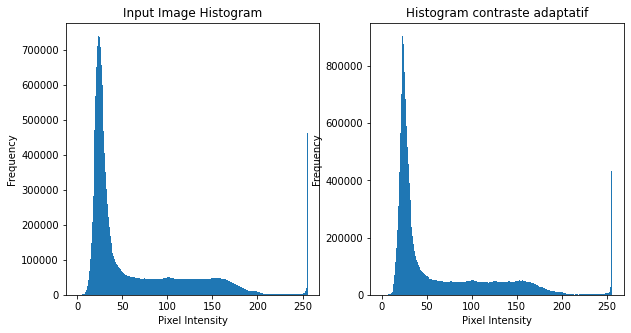

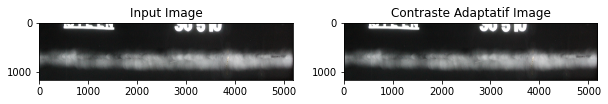

In [67]:
import cv2

def bilateral_filter(image, d=9, sigmaColor=75, sigmaSpace=75):
    # Appliquer le filtre bilatéral sur l'image
    return cv2.bilateralFilter(image, d, sigmaColor, sigmaSpace)


# Read input image
img_4 = cv2.imread('/content/drive/MyDrive/DATASET_28Fév/datasetOriginale/IMG_0854.JPG')
# img_4 = cv2.imread('/content/drive/MyDrive/DATASET_28Fév/datasetOriginale/Copy of W0003_0002.png')


# Apply histogram equalization
img_bilateral_filter = bilateral_filter(img_4)


# Plot histograms of input and output images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(img_4.ravel(), 256, [0, 256])
plt.title('Input Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
plt.hist(img_bilateral_filter.ravel(), 256, [0, 256])
plt.title('Histogram contraste adaptatif')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

# Display input and output images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img_4, cv2.COLOR_BGR2RGB))
plt.title('Input Image')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_bilateral_filter, cv2.COLOR_BGR2RGB))
plt.title('Contraste Adaptatif Image')
plt.show()


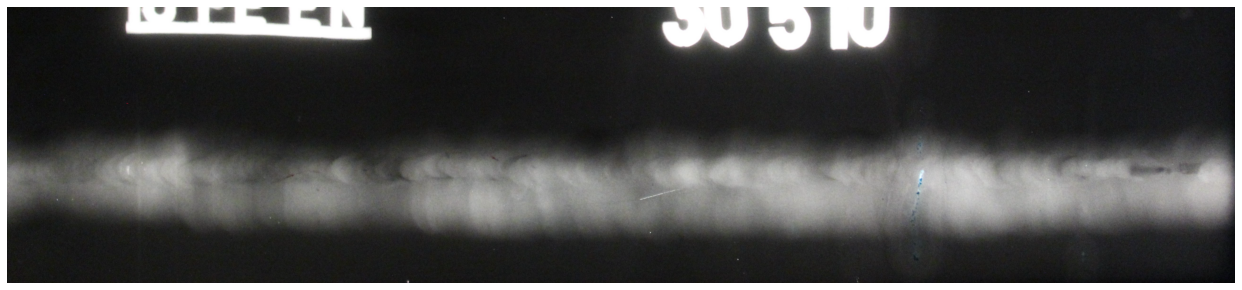

In [68]:
plt.figure(figsize=(22, 22))
plt.imshow(img_4, cmap='gray')
plt.axis('off')
plt.show()

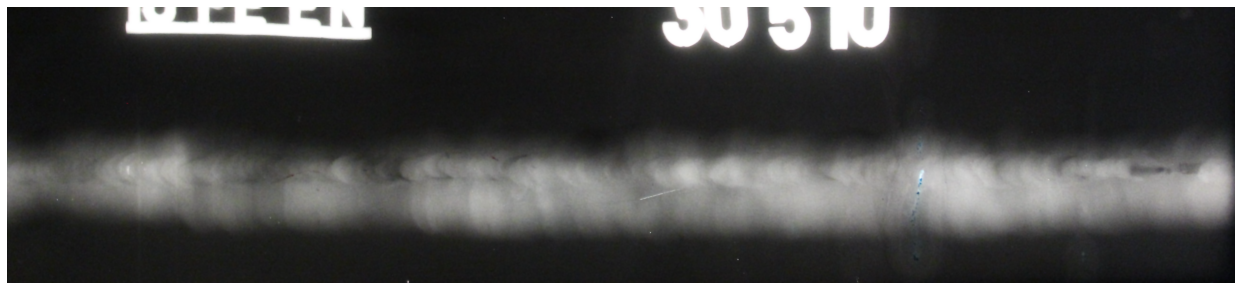

In [69]:
plt.figure(figsize=(22, 22))
plt.imshow(img_bilateral_filter, cmap='gray')
plt.axis('off')
plt.show()

### canny_edge_detection

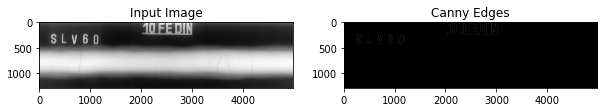

In [71]:
import cv2
import numpy as np

def canny_edge_detection(image, threshold1=100, threshold2=200):
    # Vérifier si l'image est en niveaux de gris
    if len(image.shape) == 2:
        gray_image = image
    else:
        # Convertir l'image en niveaux de gris
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Appliquer un flou gaussien pour réduire le bruit
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
    
    # Détecter les contours avec l'algorithme Canny
    edges = cv2.Canny(blurred_image, threshold1, threshold2)
    
    # Retourner l'image avec les contours détectés
    return edges


# # Read input image
# img_5 = cv2.imread('/content/drive/MyDrive/DATASET_28Fév/datasetOriginale/IMG_0854.JPG', cv2.IMREAD_GRAYSCALE)
img_5 = cv2.imread('/content/drive/MyDrive/DATASET_28Fév/datasetOriginale/Copy of W0003_0067.png', cv2.IMREAD_GRAYSCALE)
# img_5 = cv2.imread('/content/drive/MyDrive/DATASET_28Fév/datasetOriginale/Copy of W0003_0002.png', cv2.IMREAD_GRAYSCALE)


# Apply Canny edge detection
edges = canny_edge_detection(img_5)

# Display input image and edges
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_5, cmap='gray')
plt.title('Input Image')
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edges')
plt.show()


## réduire le bruit 

In [77]:
import cv2

img_7 = cv2.imread('/content/drive/MyDrive/DATASET_28Fév/datasetOriginale/IMG_0854.JPG')
# img_7 = cv2.imread('/content/drive/MyDrive/DATASET_28Fév/datasetOriginale/IMG_1214.JPG')

# Appliquer la réduction de bruit
denoised_img = cv2.fastNlMeansDenoising(img_7, None, 10, 7, 21)


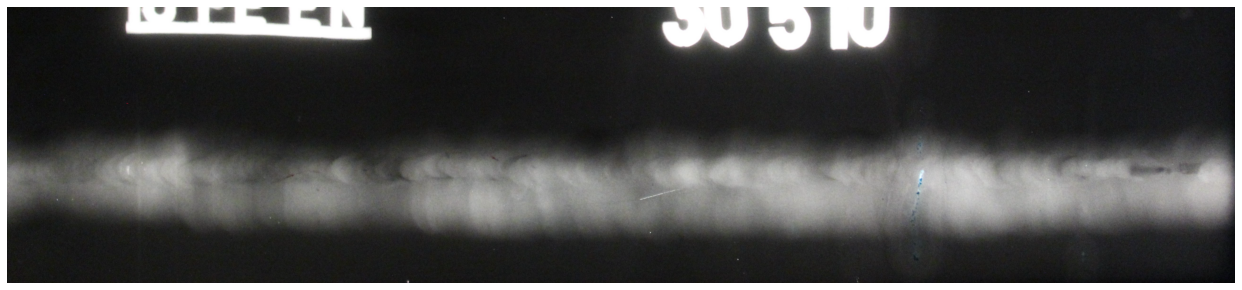

In [78]:
plt.figure(figsize=(22, 22))
plt.imshow(img_7, cmap='gray')
plt.axis('off')
plt.show()

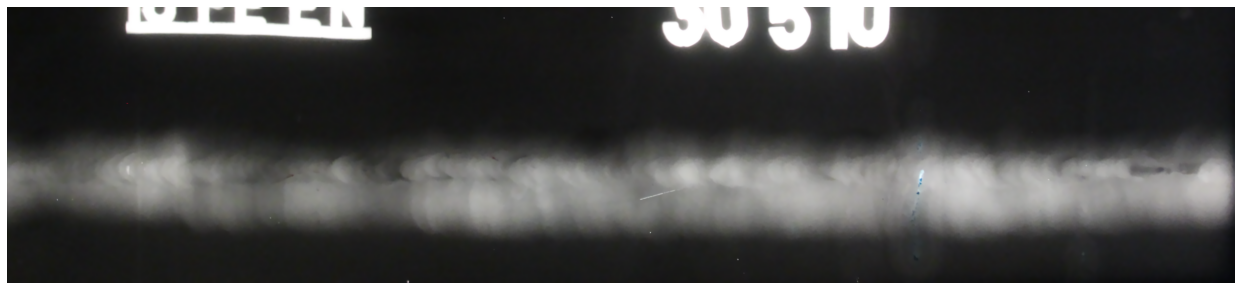

In [79]:
plt.figure(figsize=(22, 22))
plt.imshow(denoised_img, cmap='gray')
plt.axis('off')
plt.show()